In [11]:
!pip install -q kaggle

In [7]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mhemanthkumaryadav","key":"d73d447f1c3ab8afaff11df667844d58"}'}

In [8]:
!cp kaggle.json ~/.kaggle

In [9]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.30MB/s]


In [10]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df =pd.read_csv('/content/customer-segmentation-tutorial-in-python.zip')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Understanding the Data**

In [14]:
df.shape

(200, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [22]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<ipython-input-30-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

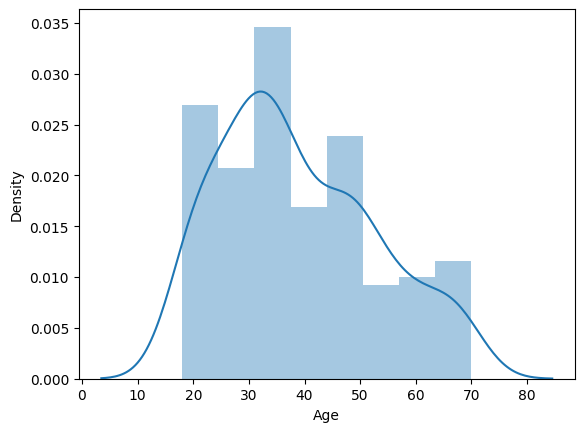

In [30]:
sns.distplot(df.Age)

<ipython-input-36-77ab2087438d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'], bins=20, kde=True, color='skyblue')


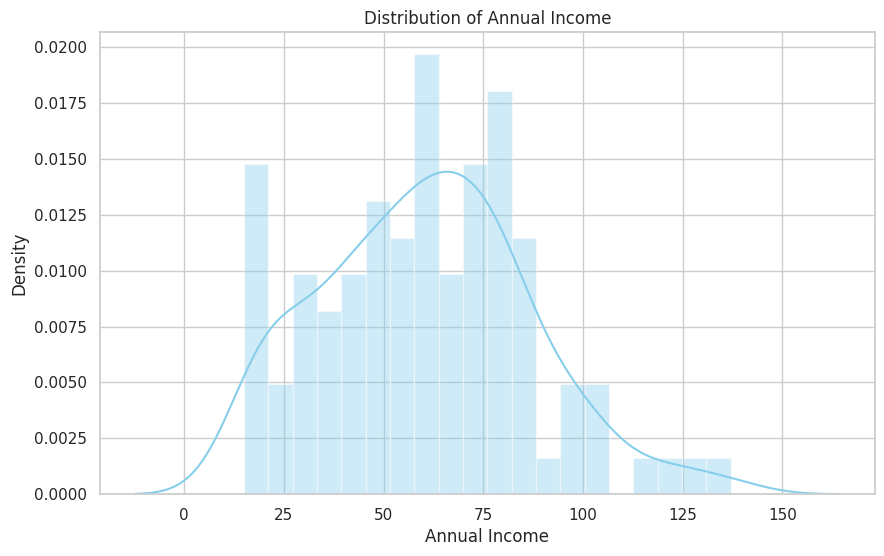

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.distplot(df['Annual Income (k$)'], bins=20, kde=True, color='skyblue')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

<ipython-input-37-e82360727829>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'], bins=20, kde=True, color='skyblue')


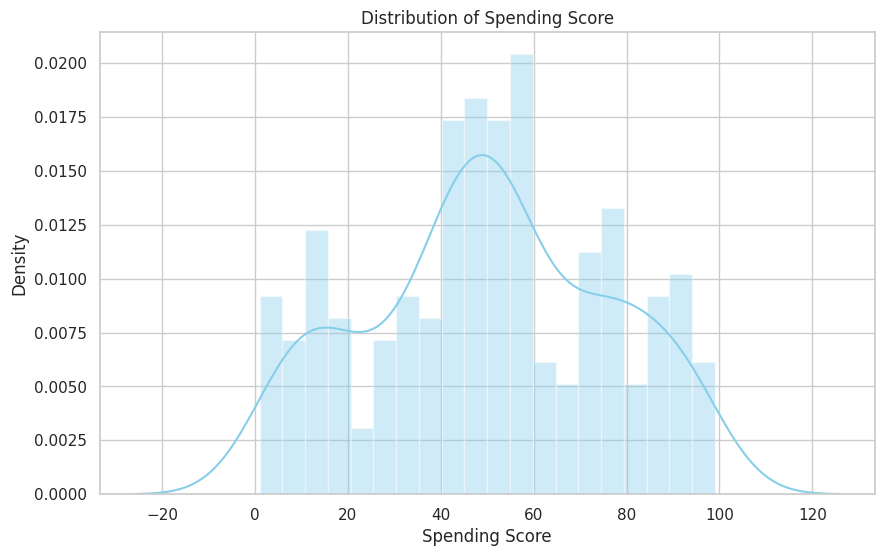

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.distplot(df['Spending Score (1-100)'], bins=20, kde=True, color='skyblue')
plt.xlabel('Spending Score')
plt.ylabel('Density')
plt.title('Distribution of Spending Score')
plt.show()

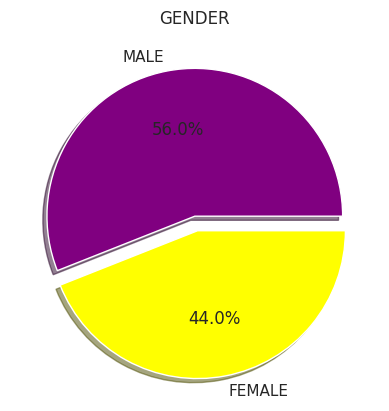

In [38]:
plt.pie(df.Gender.value_counts(),[0,0.1],labels = ['MALE','FEMALE'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow'],)
plt.title('GENDER')
plt.show()

<Axes: ylabel='Gender'>

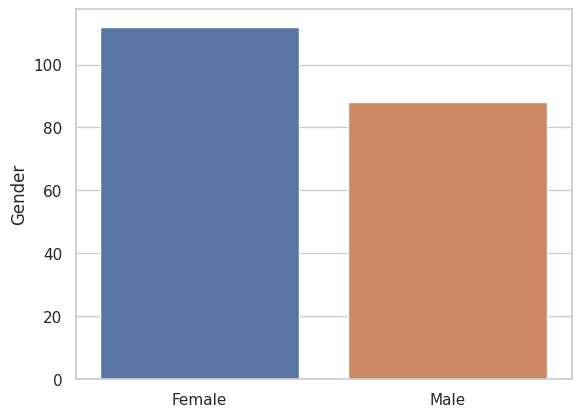

In [39]:
sns.barplot(x =df.Gender.value_counts().index,y =df.Gender.value_counts() )

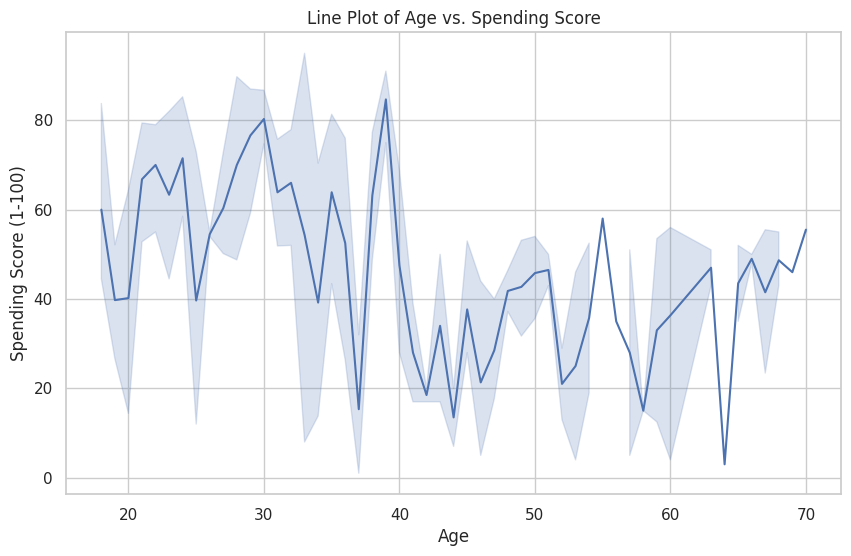

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=df['Age'], y=df['Spending Score (1-100)'])

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Line Plot of Age vs. Spending Score')

plt.show()

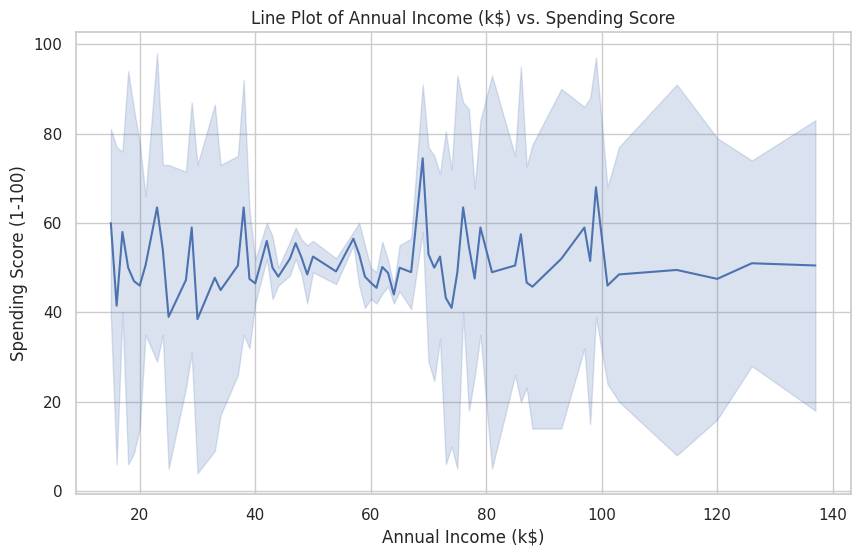

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Line Plot of Annual Income (k$) vs. Spending Score')

plt.show()

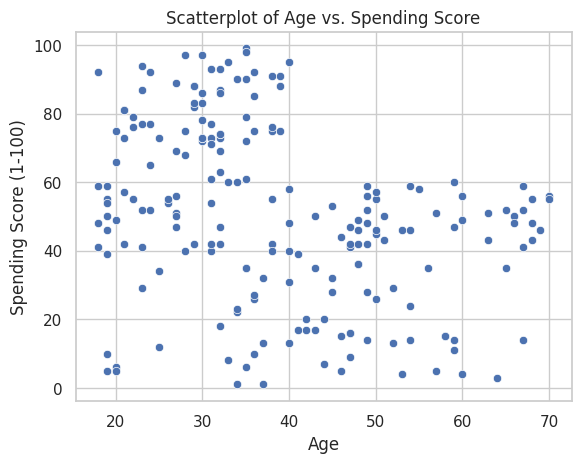

In [43]:
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot of Age vs. Spending Score')
plt.show()

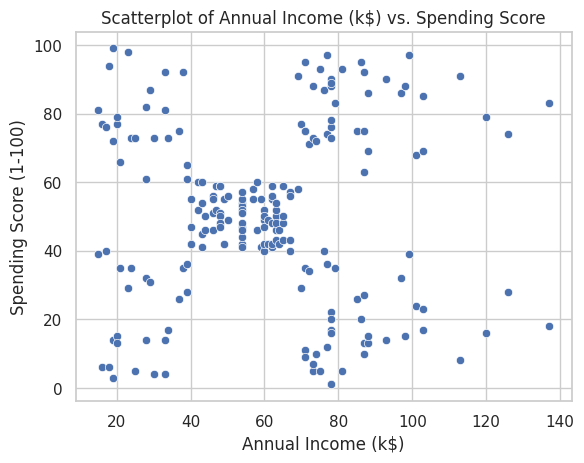

In [44]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot of Annual Income (k$) vs. Spending Score')
plt.show()

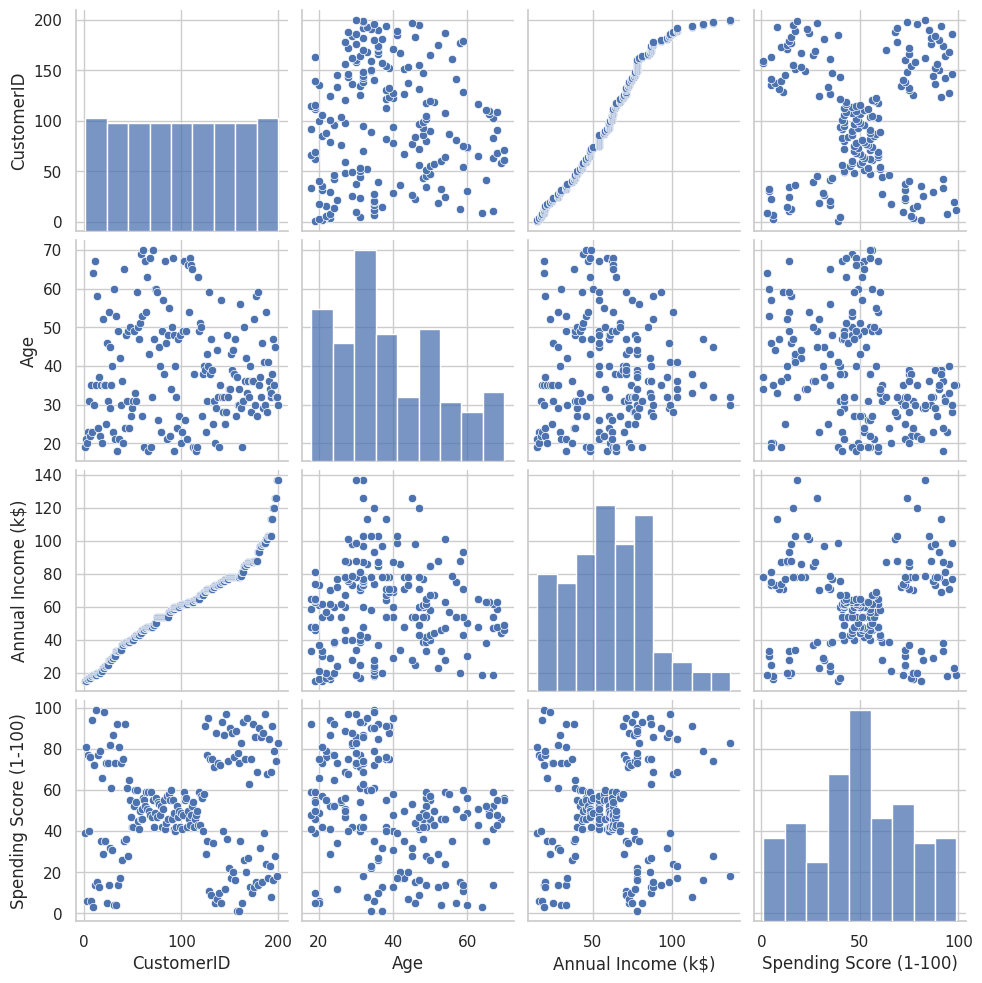

In [45]:
sns.pairplot(df)

<ipython-input-46-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

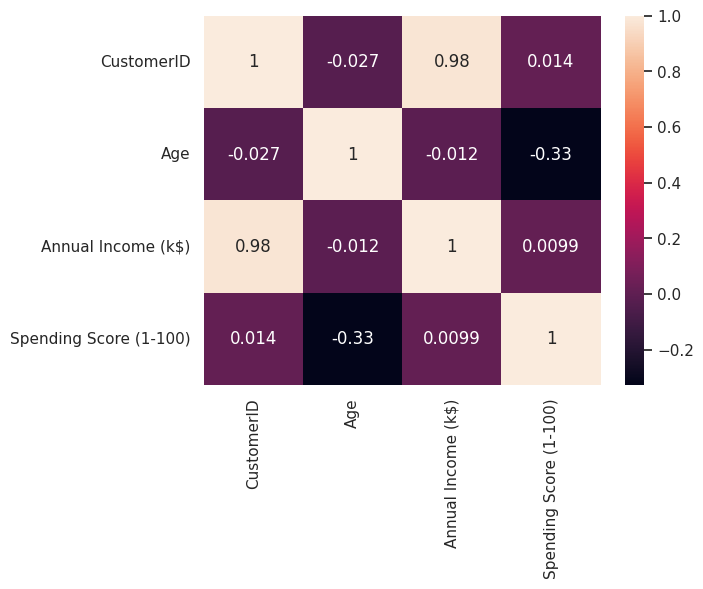

In [46]:
sns.heatmap(df.corr(),annot=True)

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
wcss = []
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

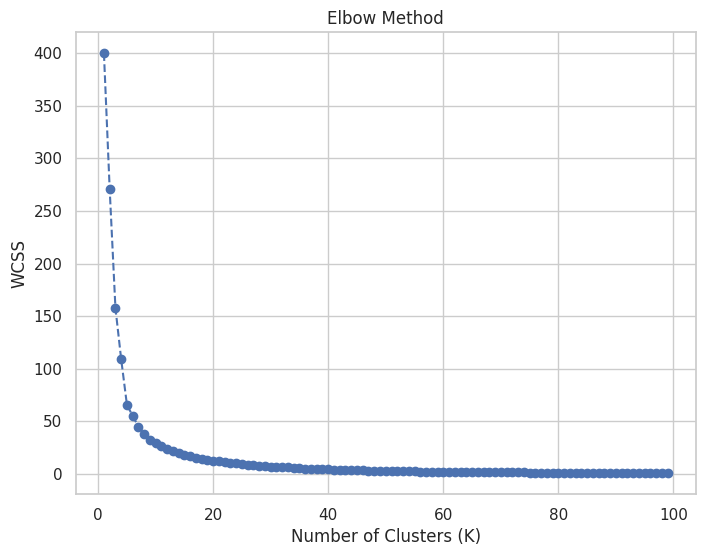

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 100), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [91]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [92]:
df['Cluster'] = kmeans.labels_

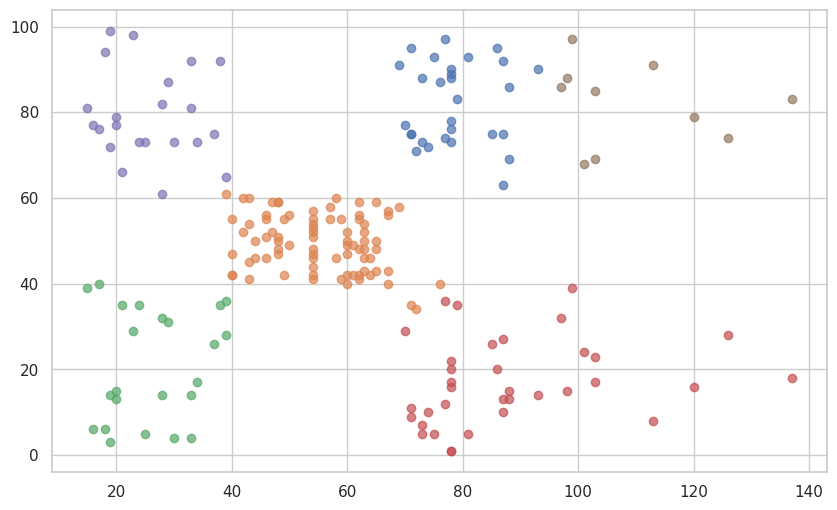

In [93]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)

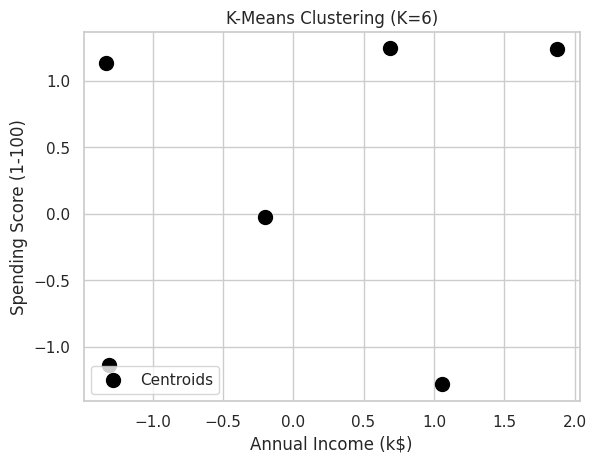

In [94]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.legend()
plt.show()

In [95]:
new_data = np.array([[35, 60], [45, 20], [25, 70]])
new_data_scaled = scaler.transform(new_data)
new_cluster_labels = kmeans.predict(new_data_scaled)
print("Cluster Labels for New Data:")
print(new_cluster_labels)


Cluster Labels for New Data:
[4 2 4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
